# Demo RNA Multi-Perceptrón Backpropagation para estimar un valor

1) Cargar librerías:

In [ ]:
#@title Librerías a usar
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import math

print("Librerías cargadas")

Librerías cargadas


2) Cargar los datos:

In [ ]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoML/datos/'  #@param {type:"string"}


Mounted at /content/gdrive


In [ ]:
## selección de los parámetros 

#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'CLIMA.csv'  #@param {type:"string"}
#@markdown ### Nombre del atributo a estimar:
atributo_estimar = 'CantLluvia' #@param {type:"string"}
#@markdown ### Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   80#@param {type:"integer"}

## aplicación de los parámetros elegidos

# define nombre atributo de CLASE para ejemplo IRIS
ClassAttributeName = atributo_estimar

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

print("Configuración definida de ", archivo_datos)


Configuración definida de  CLIMA.csv


In [ ]:
#@title Cargar datos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos)
print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())

# genera los datos solo con la clase para entrenar y probar
Y = np.array(df.pop(ClassAttributeName))
X = np.array(df)


> Cabecera: 
   MaxTemp  MinTemp  CantLluvia  VelViento    Humedad   RadSolar
0     28.0   16.851         0.0   4.115179  54.014606  34.023094
1     29.0   15.581         0.0   3.828738  54.534280  33.991928
2     33.0   19.627         0.0   4.481996  50.441004  29.988900
3     35.0   19.131         0.0   4.038467  47.209254  30.184419
4     29.0    8.614         0.0   2.751128  34.174579  27.685916

> Características: 
            MaxTemp       MinTemp    CantLluvia     VelViento       Humedad  \
count  25974.000000  25974.000000  25974.000000  25974.000000  25974.000000   
mean      23.306640     12.267206      2.681185      3.953890     64.749881   
std        7.795314      5.563365      9.276417      1.298974     17.197800   
min        6.000000     -3.734000      0.000000      0.879855     13.768390   
25%       17.000000      8.087250      0.000000      3.021895     52.244933   
50%       23.000000     12.292000      0.000000      3.816113     65.828114   
75%       29.000000   

In [ ]:
#@title Normalizar datos de entrada (opcional)

aplica_normalizacion = True #@param {type:"boolean"}
#@markdown Si se aplica, seleccione el tipo de método de normalización a aplicar:
tipo_normalizacion = "Standard Scaler" #@param ["Standard Scaler", "MinMax Scaler", "MaxAbs Scaler", "Robust Scaler"]

if aplica_normalizacion:

  print("10 primeros datos de Entrada antes de normalizar: ")
  print(X[:10])

  from sklearn import preprocessing

  # elegir el método de normalización
  if tipo_normalizacion == "Standard Scaler": 
    scaler = preprocessing.StandardScaler()
  elif tipo_normalizacion == "MinMax Scaler": 
    scaler = preprocessing.MinMaxScaler()
  elif tipo_normalizacion == "MaxMax Scaler": 
    scaler = preprocessing.MaxAbsScaler()
  elif tipo_normalizacion == "Robust Scaler": 
    scaler = preprocessing.RobustScaler()
  
  # normaliza los datos de entrada
  X = scaler.fit_transform(X)
  
  print("\n\n10 primeros datos de Entrada después de normalizar: ")
  print(X[:10])

10 primeros datos de Entrada antes de normalizar: 
[[28.         16.851       4.11517889 54.01460647 34.02309402]
 [29.         15.581       3.82873837 54.53428037 33.9919281 ]
 [33.         19.627       4.48199627 50.44100419 29.98889964]
 [35.         19.131       4.03846654 47.20925441 30.18441906]
 [29.          8.614       2.75112845 34.17457853 27.6859161 ]
 [30.          7.584       2.36142894 31.15338649 27.75296214]
 [24.         16.603       2.97655439 84.33995446 10.66077828]
 [25.         15.895       2.5238168  83.61034127 11.21641362]
 [17.          7.029       4.80350817 73.08001316 14.97065976]
 [17.          6.465       4.06358332 74.15440566 15.50559312]]


10 primeros datos de Entrada después de normalizar: 
[[ 0.60208618  0.82394055  0.1241687  -0.62423575  1.7047345 ]
 [ 0.73037085  0.59565707 -0.0963484  -0.5940177   1.70152134]
 [ 1.24350954  1.3229287   0.40656418 -0.8320339   1.28881509]
 [ 1.50007888  1.23377232  0.06511147 -1.01995398  1.30897285]
 [ 0.730370

In [ ]:
#@title Preparar datos

# separa al azar usando muestreo estratificado con proporción indicada
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain))

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))



> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (20779, 5)
 - y_train (cant):  20779

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (5195, 5)
 - y_test (cant):  5195


3) Establecer el modelo para la RNA

In [ ]:
rna_cant_neuronas_capas_ocultas = '15, D, 5, 3' #@param {type:"string"}
#@markdown   - Nota: 'D' indica capa Drop-Out y 'BN' indica capa Batch-Normalization
rna_tipo_capa_salida = 'lineal-Numero' 
rna_cant_epocas_entrenamiento =  100#@param {type:"integer"}

# define tamaño de datos de entrada 
num_inputs = x_train.shape[1]

# cantidad de neuronas ocultas 
#hidden_layers = [ num_inputs*3//4, num_inputs//2 ] 
hidden_layers = []
for val in rna_cant_neuronas_capas_ocultas.split(', '):
  if val == "D":
    hidden_layers.append( "DropOut" )  
  elif val == "BN":
    hidden_layers.append( "BatchNormalization" )  
  elif val.isnumeric():
    hidden_layers.append( val )
  else:
    print("Capa ", val, "descartada!")

# define si el tipo de capa de salida es softmax( True )  o lineal ( False )
# esto implica también cambiar cómo se codifican los valores de las clases a usar
tipo_output_softMax = (rna_tipo_capa_salida[:7] == 'softmax')

# cantidad de épocas del entrenamiento
cantEpocas = (100 if rna_cant_epocas_entrenamiento<1 else rna_cant_epocas_entrenamiento)

print("Configuración de RNA MLP Backpropagation definida: \n[", num_inputs, hidden_layers, ("Softmax" if tipo_output_softMax else "Dense[1] ")," ] ")

Configuración de RNA MLP Backpropagation definida: 
[ 5 ['15', 'DropOut', '5', '3'] Dense[1]   ] 


Modelo creado con  6  capas:
Model: "RNA"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 5)]               0         
                                                                 
 hidd_1 (Dense)              (None, 15)                90        
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 hidd_2 (Dense)              (None, 5)                 80        
                                                                 
 hidd_3 (Dense)              (None, 3)                 18        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 192
Trainable params

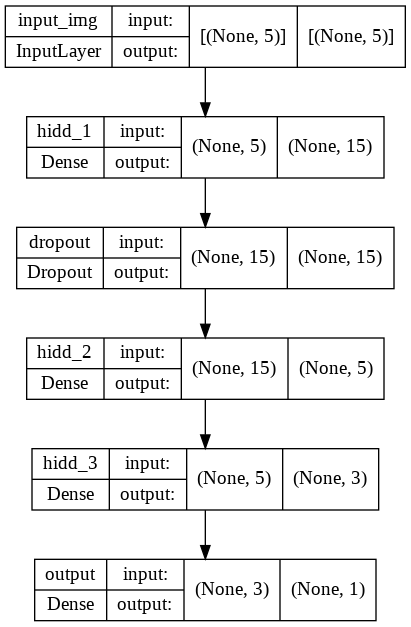

In [ ]:
#@title Establecer modelo

opt_tipo = "Adam" #@param ["Gradiente Decreciente", "Adam", "Adadelta", "Adagrad", "Adamax", "Nadam", "FTRL"]
opt_learning_rate = 0.001 #@param {type: "number"}

# define la arquitectura de capas teniendo en cuenta la definición dada anteriomente
input_img_Lay = Input(shape=(num_inputs,), name='input') # capa de entrada
eachLay = input_img_Lay
auxName = 'hidd_'
auxId = 1 
for val_hid in hidden_layers:  

  if val_hid == "DropOut":
    eachLay = Dropout(0.2)(eachLay)
  elif val_hid == "BatchNormalization":
    auxlayerName = "bn"+str(auxId)
    auxId = auxId + 1
    eachLay = BatchNormalization(name=auxlayerName)(eachLay)
  elif val_hid.isnumeric():
    # agrega la capa oculta
    auxlayerName = auxName+str(auxId)
    auxId = auxId + 1
    eachLay = Dense(int(val_hid), name=auxlayerName)(eachLay) # capas ocultas

# agrega capa de salida
if tipo_output_softMax:
    # se genera una capa softmax
    output_img_Lay = Dense(units = len(CLASES), activation='softmax', name='output')(eachLay) # capa de salida
else:
    # se genera una capa lineal con una salida numérica
    output_img_Lay = Dense(1, activation=None, name='output')(eachLay) # capa de salida


if opt_tipo == "Gradiente Decreciente":
  opt = keras.optimizers.SGD(learning_rate=opt_learning_rate)
elif opt_tipo == "Adam":
  opt = keras.optimizers.Adam(learning_rate=opt_learning_rate)
elif opt_tipo == "Adadelta":
  opt = keras.optimizers.Adadelta(learning_rate=opt_learning_rate)
elif opt_tipo == "Adagrad":
  opt = keras.optimizers.Adagrad(learning_rate=opt_learning_rate)
elif opt_tipo == "Adamax":
  opt = keras.optimizers.Adamax(learning_rate=opt_learning_rate)
elif opt_tipo == "Nadam":
  opt = keras.optimizers.Nadam(learning_rate=opt_learning_rate)
elif opt_tipo == "FTRL":
  opt = keras.optimizers.Ftrl(learning_rate=opt_learning_rate)
else:
  opt = keras.optimizers.Adam()

# genera el modelo RNA MLP Backpropagation
model = Model(input_img_Lay, output_img_Lay, name='RNA')

# utiliza un loss de valor numérico
model.compile(optimizer=opt, loss='mse')

print("Modelo creado con ", len(model.layers), " capas:")
model.summary()
print("\n")
plot_model(model, show_layer_names=True, show_shapes=True)


4) Entrenar el modelo de la RNA:

In [ ]:
#@title Entrenar

activar_corte_por_estabilidad_error_val = False #@param {type:"boolean"}

# separa al azar usando muestreo al azar del 10%
# para tomar algunos como datos de validación
x_t, x_v, y_t, y_v = train_test_split(x_train, 
                                       (y_trainEnc if tipo_output_softMax else y_train), 
                                       test_size=0.1)

print("\n> De los ", len(x_train), "ejemplos de entrenamiento: ")
print("            se usan ", len(x_t), "ejemplos para entrenar ")
print("            y ", len(x_v), "ejemplos para validar.")

print("\n\n>Comienza el Entrenamiento:")

if activar_corte_por_estabilidad_error_val:
  # se agrega un callBack para que corte 
  # si el error de validación no sigue bajando
  # y devuelva los mejores pesos obtenidos
  early_stopping_monitor = keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0.01,
      patience=20,
      verbose=0,
      mode='min',
      baseline=None,
      restore_best_weights=True
  )
  callbacksEntr = [early_stopping_monitor]
else:
  early_stopping_monitor = None
  callbacksEntr = []

# lleva a cabo el entrenamiento
history = model.fit(x_t, y_t,
          epochs = cantEpocas, 
          validation_data=(x_v, y_v,),
          callbacks=callbacksEntr ) 

print("\n>Entrenamiento Finalizado.")



> De los  20779 ejemplos de entrenamiento: 
            se usan  18701 ejemplos para entrenar 
            y  2078 ejemplos para validar.


>Comienza el Entrenamiento:
Epoch 1/100
585/585 [==============================] - 2s 2ms/step - loss: 72.5723 - val_loss: 48.7313
Epoch 2/100
585/585 [==============================] - 1s 2ms/step - loss: 69.5989 - val_loss: 48.2094
Epoch 3/100
585/585 [==============================] - 1s 2ms/step - loss: 69.5872 - val_loss: 49.0455
Epoch 4/100
585/585 [==============================] - 1s 2ms/step - loss: 69.3349 - val_loss: 49.7567
Epoch 5/100
585/585 [==============================] - 1s 2ms/step - loss: 69.4644 - val_loss: 48.1849
Epoch 6/100
585/585 [==============================] - 1s 2ms/step - loss: 69.3784 - val_loss: 48.3799
Epoch 7/100
585/585 [==============================] - 1s 2ms/step - loss: 68.9101 - val_loss: 48.2028
Epoch 8/100
585/585 [==============================] - 1s 2ms/step - loss: 68.8697 - val_loss: 48.4038
Epoch 9

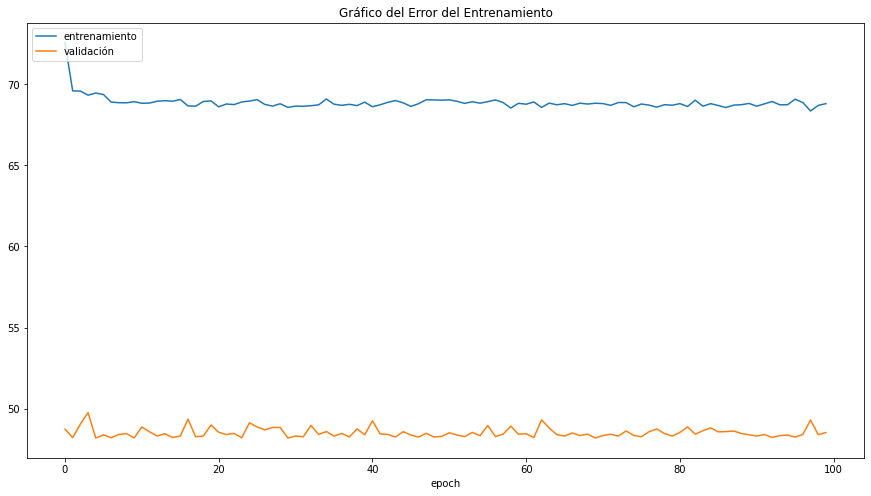

In [ ]:
#@title Mostrar Gráficos del Entrenamiento
plt.figure(figsize=(15,8)) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Gráfico del Error del Entrenamiento')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'validación'], loc='upper left')
plt.show()


*** Resultados con datos de Entrenamiento: 



 Error Absoluto: 
            Mínimo: 0.00011 
            Promedio: 4.01150 ± 7.09261
            Máximo: 158.48643 


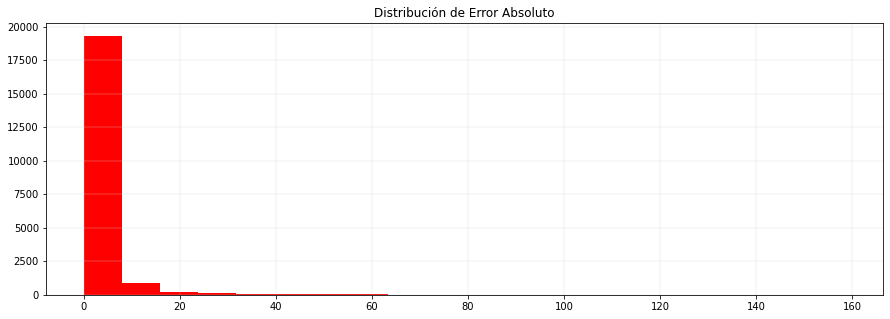


 Error Relativo: 
            Mínimo: 0.00% 
            Promedio: 18573521.76 ± 20198436.70
            Máximo: 125799789.43% 


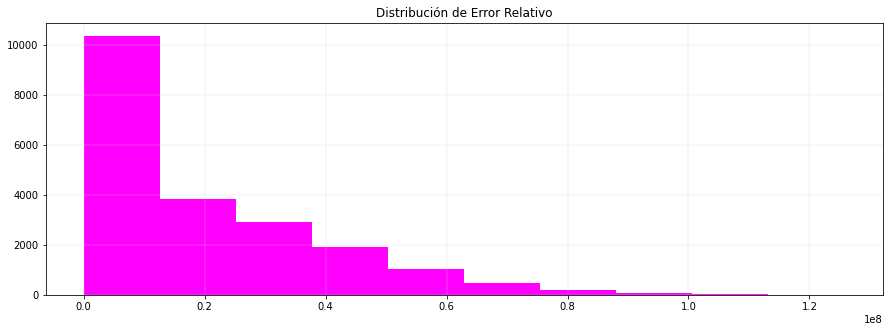

In [ ]:
#@title Probar red entrenada con datos de entrenamiento

mostrar_detalle_entrenamiento = False #@param {type:"boolean"}

# función auxiliar para el cálculo de error
def calcErrores(pred, real, mostrarDetalle=False):
  arAbs = []
  arRel = []
  
  if mostrarDetalle:
    print("\n")
    print("\t Real \t\t\t Estimado \t\t Error Absoluto \t Error Relativo")

  for pV, r in zip(pred, real):
    # toma el valor estimado/predecido
    p = pV[0]
    # controla que sean números
    if not(math.isnan(r) or math.isnan(p)):
      # hace los cálculos
      eAbs = abs(r - p)
      if r != 0:
        eRel = (eAbs / r)*100.0
      else:
        eRel = (eAbs / 0.00001)*100.0
      arAbs.append(eAbs)
      arRel.append(eRel)
    
      if mostrarDetalle:
        print("\t{:>8.2f} \t\t {:>8.2f} \t\t {:>8.2f} \t\t {:>8.2f}%".format(r, p, eAbs, eRel))

  return arAbs, arRel

def generarGrafico(ar, tit, b=10, c=None):
     # genera gráfico de los errores
    fig = plt.figure(figsize=(15,5)) 
 #   ax = fig.add_axes( [0, 0, 0.8, 0.8] )
 #   ax.boxplot( [arAbs, arRel] )
 #   ax.set_xticklabels( ["Error Absoluto", "Error Relativo"] )
#    plt.legend(["Error Absoluto", "Error Relativo"], loc='best')
    plt.hist( ar, bins=b, color=c )
    plt.grid(color='lightgrey', which='both', axis='both', linestyle='solid', linewidth=0.3)
    plt.title("Distribución de "+ tit)
    plt.show()


# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, detalle=False):

    # procesa las imágenes de prueba con el modelo 
    estimVals = model.predict(x)

    # llama a la función
    arAbs, arRel = calcErrores(estimVals, y, detalle)

    # muestra métricas
    print("\n")
    print("\n Error Absoluto: ")
    print("            Mínimo: {:.5f} ".format(np.min(arAbs)) )
    print("            Promedio: {:.5f} ± {:.5f}".format(np.mean(arAbs), np.std(arAbs)) )
    print("            Máximo: {:.5f} ".format(np.max(arAbs)) )
    generarGrafico(arAbs, "Error Absoluto", 20, "red")
    
    print("\n Error Relativo: ")
    print("            Mínimo: {:.2f}% ".format(np.min(arRel)) )
    print("            Promedio: {:.2f} ± {:.2f}".format(np.mean(arRel), np.std(arRel)) )
    print("            Máximo: {:.2f}% ".format(np.max(arRel)) )
    generarGrafico(arRel, "Error Relativo", 10, "magenta")


# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, mostrar_detalle_entrenamiento)


6) Evaluar el modelo de la RNA entrenado con los datos de prueba:

Se han truncado las últimas 5000 líneas del flujo de salida.
	    0.00 		     5.88 		     5.88 		 58803725.24%
	    0.00 		     1.14 		     1.14 		 11383764.74%
	    0.00 		     0.38 		     0.38 		 3793280.42%
	    0.00 		     0.05 		     0.05 		 516453.39%
	    0.00 		     6.72 		     6.72 		 67237973.21%
	    0.00 		    -1.25 		     1.25 		 12513799.67%
	    0.00 		    -4.55 		     4.55 		 45452241.90%
	    0.00 		    -4.45 		     4.45 		 44511299.13%
	    0.00 		    -2.06 		     2.06 		 20561521.05%
	    0.00 		    -0.01 		     0.01 		 71735.98%
	    3.00 		     8.19 		     5.19 		   172.86%
	    2.00 		     7.00 		     5.00 		   249.84%
	    5.00 		     4.42 		     0.58 		    11.60%
	    0.00 		    -1.63 		     1.63 		 16298494.34%
	    2.00 		     8.30 		     6.30 		   314.95%
	    0.00 		    -4.40 		     4.40 		 43991603.85%
	    0.00 		    -4.22 		     4.22 		 42239551.54%
	    0.00 		    -1.06 		     1.06 		 10631914.14%
	    0.00 		    -1.86 		     1.86 		 18594057.56%
	    2.

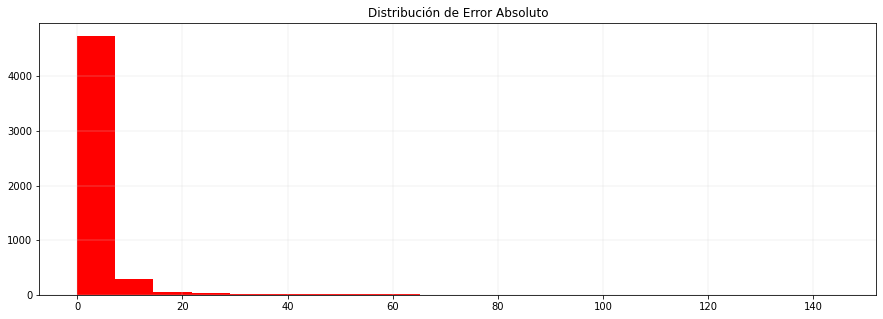


 Error Relativo: 
            Mínimo: 0.09% 
            Promedio: 18464164.11 ± 19806235.71
            Máximo: 124798984.53% 


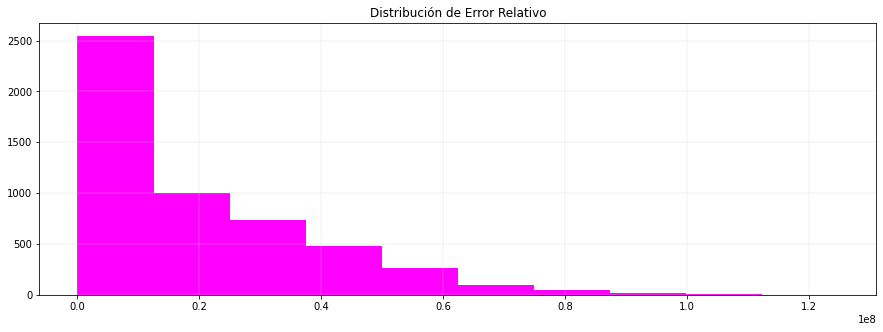

In [ ]:
 #@title Probar red entrenada con datos de prueba
 # evalua al modelo entrenado

 mostrar_detalle_prueba = True #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, mostrar_detalle_prueba)